In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

2. DAU/WAU/MAU를 line chart로 시각화 (fullVisiorid, Date 컬럼 변환)
    - **date**를 시간형식으로 바꾸고, 이를 일, 주, 월 단위로 묶기.
    - line chart로 시각화




### dau 방법1             
date      /    366 non-null   / datetime64[ns]
fullVisitorId / 366 non-null  /  int64  

### dau 방법2(resample)  : date는 인덱스
cnt  /   366 non-null  /  int64
------------- ---------------
### wau 방법1(resample) : date는 인덱스
cnt   /  54 non-null    / int64
--------------- -------------
### mau 방법1(strftime)
YMdate     /    13 non-null /    object
fullVisitorId / 13 non-null   /  int64 
### mau 방법2(resample)
cnt  /   13 non-null    / int64

### DAU 구하기
 - 방법: 연도-월-일로 그룹화하여 각 유저서 카운트하기
 - 참고: https://kiyoja07.blogspot.com/2019/04/python-dau.html

In [2]:
df = pd.read_csv("/Users/t2023-m0017/Desktop/[파이썬]/ML/심화프로젝트/GA4데이터/train.csv")

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2569399007.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/t2023-m0017/Desktop/[파이썬]/ML/심화프로젝트/GA4데이터/train.csv")


In [3]:
df1 = df[['date','fullVisitorId']]
df1

,date,fullVisitorId
0,20160902,1131660440785968503
1,20160902,377306020877927890
2,20160902,3895546263509774583
3,20160902,4763447161404445595
4,20160902,27294437909732085
...,...,...
903648,20170104,5123779100307500332
903649,20170104,7231728964973959842
903650,20170104,5744576632396406899
903651,20170104,2709355455991750775


In [4]:
#date컬럼을 날짜형으로 바꾸기
df1['date'] = pd.to_datetime(df1.date, format = '%Y%m%d')

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2006419733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1.date, format = '%Y%m%d')


In [5]:
# 방법 2를 위한 df
df2 = df[['date','fullVisitorId']]
df2['date'] = pd.to_datetime(df2.date, format = '%Y%m%d')

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/966045300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2.date, format = '%Y%m%d')


In [6]:
# 방법1. 각 date별로 unique한 fullVisitorId 개수 세기
#dau = df1.groupby('date')['fullVisitorId'].nunique().reset_index()


# 방법2. resample를 사용하여 개수하기 -> resample할 수 있는 건 DatetimeIndex만 가능, 인덱스를 다시 만들어줘야 함
df2.set_index(df2['date'], inplace=True)
df2['fullVisitorId']=pd.DataFrame(df2['fullVisitorId'].unique()) 
df2['cnt'] =1
dau2 = df2.resample('D')['cnt'].agg(np.sum) #count는 안되는듯..cnt컬럼을 만들어서 합산
dau2 = pd.DataFrame(dau2) #.reset_index() 안됌

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2076503909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fullVisitorId']=pd.DataFrame(df2['fullVisitorId'].unique())
/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2076503909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cnt'] =1


<Axes: xlabel='date', ylabel='cnt'>

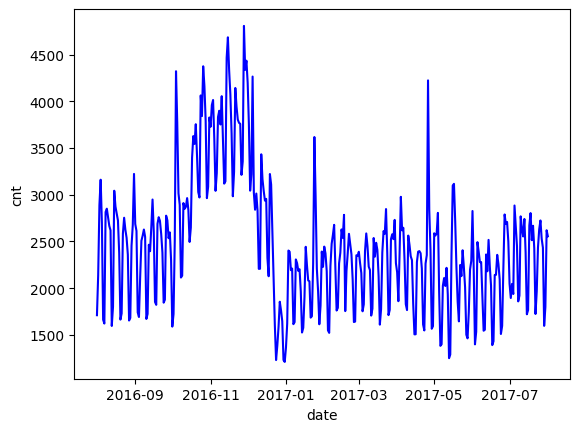

In [8]:
#방법1. 
#sns.lineplot(data = dau, x = 'date', y = 'fullVisitorId', color = 'red')

#방법2
sns.lineplot(data = dau2, x = 'date', y = 'cnt', color = 'blue')

### WAU: 월별 활동 유저수
- https://heytech.tistory.com/446

In [9]:
dfw = df[['date','fullVisitorId']]
dfw['fullVisitorId']=pd.DataFrame(dfw['fullVisitorId'].unique()) 
dfw['date'] = pd.to_datetime(dfw.date, format = '%Y%m%d')
dfw

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2185005511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['fullVisitorId']=pd.DataFrame(dfw['fullVisitorId'].unique())
/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2185005511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['date'] = pd.to_datetime(dfw.date, format = '%Y%m%d')


,date,fullVisitorId
0,2016-09-02,1131660440785968503
1,2016-09-02,377306020877927890
2,2016-09-02,3895546263509774583
3,2016-09-02,4763447161404445595
4,2016-09-02,27294437909732085
...,...,...
903648,2017-01-04,NaN
903649,2017-01-04,NaN
903650,2017-01-04,NaN
903651,2017-01-04,NaN


In [15]:
# 날짜 기준으로 인덱싱하기
dfw.set_index(dfw['date'], inplace=True)

In [16]:
# 인덱스를 주-월 기준으로 resample 하여 cnt의 수량을 합산
dfw['cnt'] =1
wau = dfw.resample('W-MON')['cnt'].agg(np.sum)
wau = pd.DataFrame(wau)

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/27731199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['cnt'] =1


(array([17045., 17106., 17167., 17226., 17287., 17348.]),
 [Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07')])

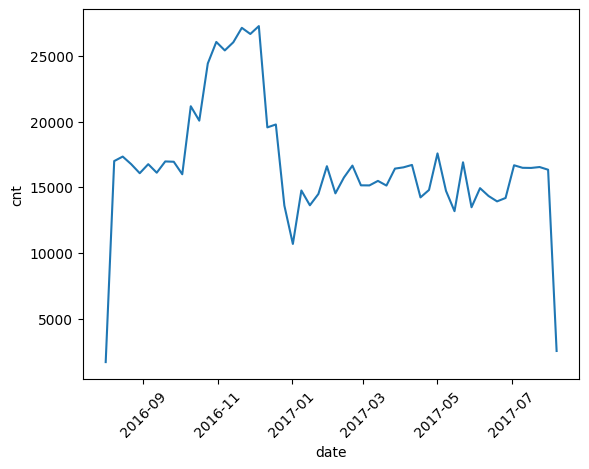

In [17]:
sns.lineplot(data = wau, x = 'date', y = 'cnt')
plt.xticks(rotation=45)

### MAU: 월별 활동 유저수
- 방법: 연도-월로 그룹화하여 각 유저서 카운트하기


In [18]:
# from datetime import datetime
# 방법1. strftime을 사용한 MAU
df1['YMdate'] = df1['date'].dt.strftime('%Y-%m')
df1

/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/2705805937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YMdate'] = df1['date'].dt.strftime('%Y-%m')


,date,fullVisitorId,YMdate
0,2016-09-02,1131660440785968503,2016-09
1,2016-09-02,377306020877927890,2016-09
2,2016-09-02,3895546263509774583,2016-09
3,2016-09-02,4763447161404445595,2016-09
4,2016-09-02,27294437909732085,2016-09
...,...,...,...
903648,2017-01-04,5123779100307500332,2017-01
903649,2017-01-04,7231728964973959842,2017-01
903650,2017-01-04,5744576632396406899,2017-01
903651,2017-01-04,2709355455991750775,2017-01


In [19]:
mau = df1.groupby('YMdate')['fullVisitorId'].nunique().reset_index()
df1['YMdate'] = pd.to_datetime(df1['YMdate'], format = '%Y-%m')
mau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YMdate         13 non-null     object
 1   fullVisitorId  13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


/var/folders/1y/dmb1rjqn7y7ft_t08s501gxm0000gn/T/ipykernel_13281/227617163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YMdate'] = pd.to_datetime(df1['YMdate'], format = '%Y-%m')


In [20]:
# 방법2. resample을 사용한 MAU
mau2 = df2.resample('M')['cnt'].agg(np.sum)
mau2 = pd.DataFrame(mau2)
mau2

,cnt
date,
2016-08-31,74759
2016-09-30,71032
2016-10-31,97506
2016-11-30,113972
2016-12-31,79124
2017-01-31,64694
2017-02-28,62192
2017-03-31,69931
2017-04-30,67126


(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

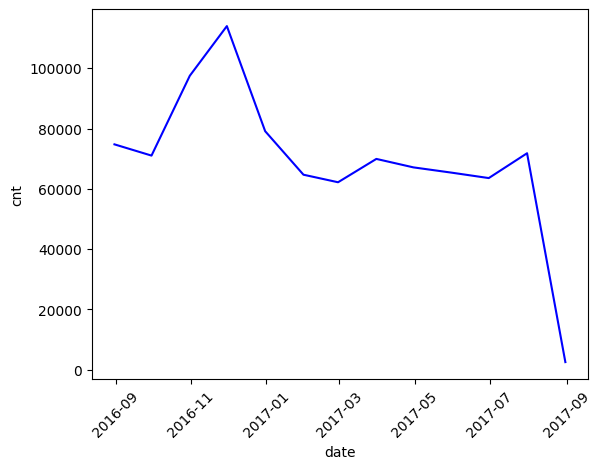

In [21]:
#방법1(strftime)
# sns.lineplot(data = mau, x = 'YMdate', y = 'fullVisitorId', color = 'red')
# plt.xticks(rotation=45)

#방법2(resample)
sns.lineplot(data = mau2, x = 'date', y = 'cnt', color = 'blue')
plt.xticks(rotation=45) 
## X축 명이 달라서 같이 안그려 지는 듯..

(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

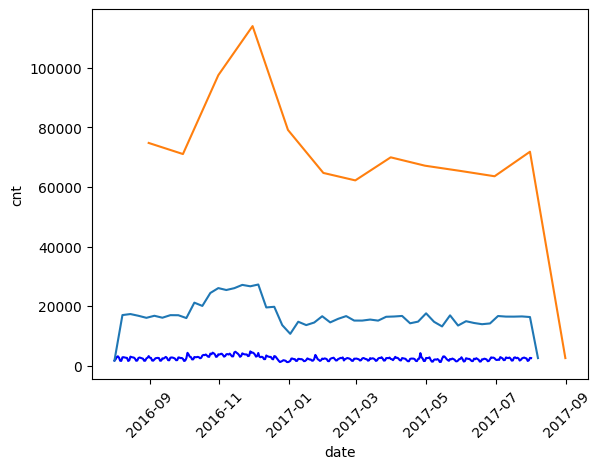

In [26]:
# 시각화를 같이 하는 것은 x축 이름이 같아야 하는것 같음
sns.lineplot(data = dau2, x = 'date', y = 'cnt', color = 'blue')
sns.lineplot(data = wau, x = 'date', y = 'cnt')
sns.lineplot(data = mau2, x = 'date', y = 'cnt')
plt.xticks(rotation=45)